In [1]:
import pandas as pd
import nltk
import regex as re
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/data_africa_cleaned.csv")

In [3]:
data.shape

(1953, 4)

In [4]:
data['content'][5]

'@NaaLantswei Global warming'

# Data Exploration

In [5]:
# checking duplicates if there are retweets
data['content'].duplicated().sum()


3

In [6]:
# dropping duplicate tweets based on Text coloumn
data = data.drop_duplicates(subset=['content'], keep='first')

In [7]:
data.shape

(1950, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1952
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1950 non-null   object
 1   place    1950 non-null   object
 2   year     1950 non-null   int64 
 3   month    1950 non-null   object
dtypes: int64(1), object(3)
memory usage: 76.2+ KB


# Text preprocessing

In [9]:
# converting text into lower case
data['content'] = data['content'].str.lower()

In [10]:
# removing twitter mentions(@, #, punctuations) from the tweets
data['content'] = data['content'].str.replace("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", '', regex = True)

In [11]:
# removing hyperlinks from the tweets
data['content'] = data['content'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',regex = True)

In [12]:
data['content'][4]

' for a better  worldethiopia would be deserved for the  rewards for a better to reduce impacts of  climate crisis s country ethiopia was planted 25 billions to oppose the  warming since 2019 reward would  motivate for the  world '

In [13]:
# emoji removal
data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,content,place,year,month
0,if its only one car in a year its nothing an...,africa,2022,August
1,stopppppp stop ittttttt,africa,2022,August
2,we need to stop global warming so i can grow t...,africa,2022,August
3,for a better worldethiopia would be deserve...,africa,2022,August
4,for a better worldethiopia would be deserved...,africa,2022,August
...,...,...,...,...
1948,man global warming is the only thing that co...,africa,2018,February
1949,global warming is real,africa,2018,February
1950,where is the,africa,2018,February
1951,lest we not engulfed stop global warming,africa,2018,February


In [14]:
data['content'][3]

'  for a better  worldethiopia would be deserved for the  rewards for a better to reduce impacts of  climate crisis s country ethiopia was planted 25 billions to oppose the  warming since 2019 reward would  motivate for the  world'

In [15]:
#tweets_combined.to_csv("combine_tweet_2019_2022(with_stopwords).csv",index = False)

In [16]:
# removing stopwords using ntlk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop = (stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# adding stop words to the existing list
new_stopwords = ["isnt", "dont", "maam", "according", "u", "climate change", "global warming", "know","climate", "change", "warming","global","say", "go", "use", "said", "warmingchange", "warmingclimate","changeglobal","warming change", "thats","us", "see","via","may"]
stop.extend(new_stopwords)

In [18]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# removing stopwords
data['content']  = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [20]:
data.head()

,content,place,year,month
0,one car year nothing using electricity write d...,africa,2022,August
1,stopppppp stop ittttttt,africa,2022,August
2,need stop grow become old man working bodega f...,africa,2022,August
3,better worldethiopia would deserved rewards be...,africa,2022,August
4,better worldethiopia would deserved rewards be...,africa,2022,August


In [21]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
data['content_token'] = data['content'].apply(word_tokenize)

In [23]:
data

,content,place,year,month,content_token
0,one car year nothing using electricity write d...,africa,2022,August,"[one, car, year, nothing, using, electricity, ..."
1,stopppppp stop ittttttt,africa,2022,August,"[stopppppp, stop, ittttttt]"
2,need stop grow become old man working bodega f...,africa,2022,August,"[need, stop, grow, become, old, man, working, ..."
3,better worldethiopia would deserved rewards be...,africa,2022,August,"[better, worldethiopia, would, deserved, rewar..."
4,better worldethiopia would deserved rewards be...,africa,2022,August,"[better, worldethiopia, would, deserved, rewar..."
...,...,...,...,...,...
1948,man thing comes mind explain many people losin...,africa,2018,February,"[man, thing, comes, mind, explain, many, peopl..."
1949,real,africa,2018,February,[real]
1950,,africa,2018,February,[]
1951,lest engulfed stop,africa,2018,February,"[lest, engulfed, stop]"


In [24]:
data.to_csv("data_africa_cleaned_tokenized.csv", index = False)

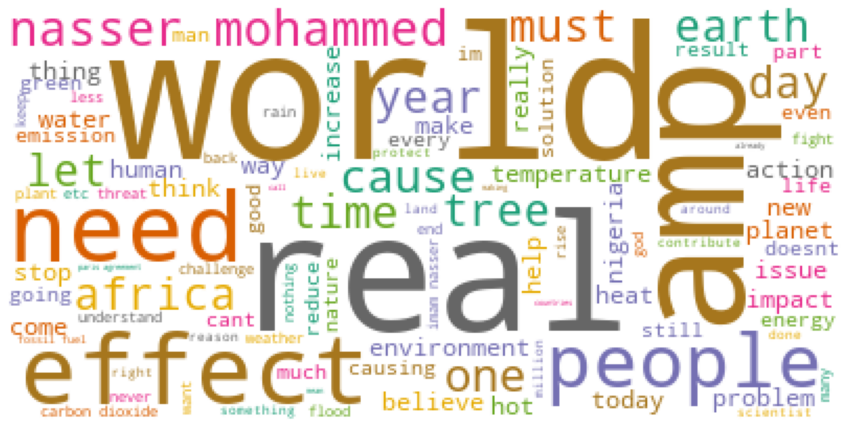

In [25]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(data['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud

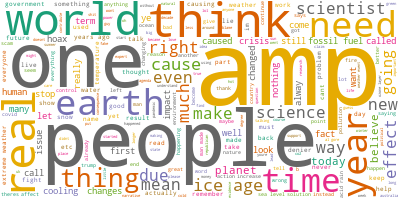

In [466]:
wordcloud.to_image()